<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA </font> </center>
# <center> <font color= #000047> Simulación Matemática </font> </center>
# <center> <font color= #000047> EXAMEN 1 : Optimización </font> </center>
# <center> <font color= #000047> Tipo: A </font> </center>

        

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> Asegúrese de escribir su nombre, y el código en las celdas comentadas.</div>

<h1> Nombres: </h1>
<hr>   

In [ ]:
David Isaac Meneses Flores

<h2>Instrucciones</h2>

- Lea detenidamente los reactivos y responda con claridad. Si se requiere hacer uso de más hojas para la realización de cálculos, es necesario que se adjunten a este archivo cuando se haga entrega del examen. Es necesario adjuntar las diferentes librerías o código que se utilice para la realización del examen.

- Responda de manera ordenada los reactivos.

- Por cada respuesta de cada reactivo se calificará __código, figuras y comentarios__.


<h2>Tabla de Reactivos</h2>

1. [Reactivo 1 (3.5 ptos)](#Problema1)
2. [Reactivo 2 (2.5 ptos)](#Problema2)
3. [Reactivo 3 (4 ptos)](#Problema3)
<hr>   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
import scipy.optimize as opt

<hr>   

### Reactivo 1 (3.5 ptos) <a name="Problema1"></a> 

Imaginemos que las necesidades semanales mínimas de una persona en proteínas, hidratos de
carbono y grasas son, respectivamente, 8, 12 y 9 unidades. Supongamos que debemos obtener un
preparado con esa composición mínima mezclando dos productos Ay B, cuyos contenidos por kilogramo
son los que se indican en la siguiente tabla:


In [1]:
import pandas as pd
df = pd.DataFrame(columns=['Proteínas', 'Hidratos', 'Grasas', 'Costo/Kg'], index = ['A','B'])
df.loc['A', :] = [2,6,1,600]
df.loc['B', :] = [1,1,3,400]
df

,Proteínas,Hidratos,Grasas,Costo/Kg
A,2,6,1,600
B,1,1,3,400


**¿Cuántos kilogramos de cada producto deberán comprarse semanalmente para que el costo de
preparar la dieta sea mínimo?**

> **1.1.-** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

>proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en $\LaTeX$ el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).



#### Variables instrumentales

Llamamos x al número de Kg. usados del producto A
Llamamos y al número de Kg. usados del producto B

#### Función objetivo (Minimizar)

F(x) = 600x + 400y

#### Restricciones 

2x+y >= 8

6x+y >= 12

x+3y >= 9

In [2]:
c = -np.array([600, 400])
A_ineq = np.array([[2, 1],
                   [6, 1],
                   [1, 3]])
b_ineq = np.array([8, 12, 9])

In [3]:
solucion = opt.linprog(c=c, A_ub=A_ineq, b_ub=b_ineq)

In [5]:
solucion

     con: array([], dtype=float64)
     fun: -1941.1764705822866
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([2.35294118e+00, 3.19140270e-11, 3.13615800e-11])
  status: 0
 success: True
       x: array([1.58823529, 2.47058824])

In [7]:
def f1(x1):
    return 8-2*x1
def f2(x1):
    return 12-6*x1
def f3(x1):
    return (9-x1)/3

In [9]:
x1 = np.linspace(0, 100)
y1 = f1(x1)
y2 = f2(x1)
y3 = f3(x1)

(0.0, 12.0, 0.0, 12.0)

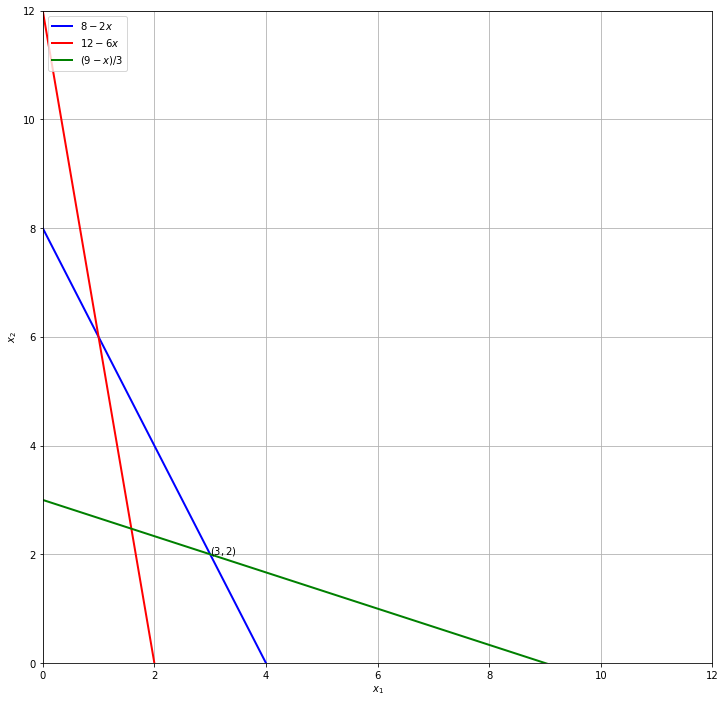

In [11]:
plt.figure(figsize=(12, 12))
plt.plot(x1, y1, 'b', lw=2, label='$8-2x$')
plt.plot(x1, y2, 'r', lw=2, label='$12-6x$')
plt.plot(x1, y3, 'g', lw=2, label='$(9-x)/3$')

plt.text(3, 2, '$(3, 2)$')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.legend(loc=2)
plt.axis([0, 12, 0, 12])

>**1.2.-** Resuelva el problema utilizando la función `linprog`. ¿Cuántos kilogramos de cada producto deberán comprarse semanalmente para que el costo de
preparar la dieta sea mínimo?

Todos los puntos que forman la región F son soluciones factibles, y por
paralelismo con la recta de beneficio nulo z vemos que R(3,2) es el punto
mínimo. Por tanto, deben comprarse 3 kg. de A y 2 kg. de B para que el
gasto sea mínimo.

Cuando la función objetivo es F(X) = 600x + 400y el valor del programa
lineal (gasto) es 2.600 pts.
Si la función objetivo es F(X) = 100x + 400y la solución óptima está en el
punto Q(1,6) y el valor del programa lineal (gasto) es 3.400 pts.

<hr>   

### Reactivo 2 (2.5 ptos) <a name="Problema2"></a> 

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016



In [77]:
# Datos extraidos de la página de quandl
import numpy as np
import pandas as pd

data = np.array([np.arange(2014,2041),
                [10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
                 10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
                 10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
                 12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
                 13.85861 , 14.135924, 14.436149]]).transpose()
df = pd.DataFrame(data, columns=["year","cost"])
df.head()

,year,cost
0,2014.0,10.051101
1,2015.0,9.259127
2,2016.0,9.444813
3,2017.0,9.557723
4,2018.0,9.977324


>**2.1.-** Usando los años como variable independiente $x$ (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$) y los costos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3. Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.


In [72]:
x=df["year"].values-2014
y=df["cost"].values

In [75]:
data

array([[2014.      ,   10.051101],
       [2015.      ,    9.259127],
       [2016.      ,    9.444813],
       [2017.      ,    9.557723],
       [2018.      ,    9.977324],
       [2019.      ,   10.298326],
       [2020.      ,   10.447217],
       [2021.      ,   10.550506],
       [2022.      ,   10.590784],
       [2023.      ,   10.657418],
       [2024.      ,   10.743085],
       [2025.      ,   10.831965],
       [2026.      ,   10.988435],
       [2027.      ,   11.153055],
       [2028.      ,   11.313326],
       [2029.      ,   11.557165],
       [2030.      ,   11.860136],
       [2031.      ,   12.122511],
       [2032.      ,   12.356448],
       [2033.      ,   12.611391],
       [2034.      ,   12.814569],
       [2035.      ,   13.111372],
       [2036.      ,   13.357134],
       [2037.      ,   13.559012],
       [2038.      ,   13.85861 ],
       [2039.      ,   14.135924],
       [2040.      ,   14.436149]])

In [78]:
def obj1(beta,x,y):
    f=beta[0]*x**0+beta[1]*x
    return np.sum((y-f)**2)

def objn(beta,x,y,n):
    #f=beta[0]*x**0+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    
    #beta=[1,-2,3]
    #[1,x,x**2]
    #1-2*x+3*x**2
    f=np.dot(beta,[x**i for i in range(n+1)])
    return np.sum((y-f)**2)

In [79]:
opt.minimize?

In [80]:
beta0=np.random.rand(2)
beta0

array([0.19816957, 0.63566438])

In [81]:
beta0=np.random.rand(2)
#beta0=np.array([1,1])
sol1=opt.minimize(objn,beta0,args=(x,y,1))
sol1

      fun: 2.3704889518172543
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([4.50015068e-06, 7.59959221e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([9.11567661, 0.18667054])

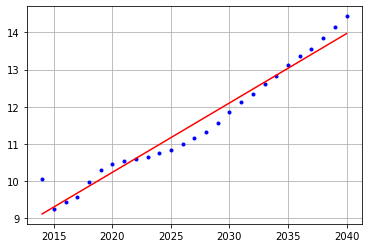

In [82]:
plt.plot(x+2014,y,'ob',ms=3)
n=1
pol=np.dot(sol1.x,[x**i for i in range(n+1)]) #evaluación de un polinomio de grado n
plt.plot(x+2014,pol,'r')
plt.grid()

In [83]:
n=3
beta0=np.random.rand(n+1)
sol2=opt.minimize(objn,beta0,args=(x,y,n))
sol2

      fun: 0.8404250801673829
 hess_inv: array([[ 2.27239619e-01, -6.41155168e-02,  4.83489338e-03,
        -1.06428505e-04],
       [-6.41155168e-02,  2.61882619e-02, -2.28213049e-03,
         5.43058126e-05],
       [ 4.83489338e-03, -2.28213049e-03,  2.13851040e-04,
        -5.32142292e-06],
       [-1.06428505e-04,  5.43058126e-05, -5.32142292e-06,
         1.36446727e-07]])
      jac: array([-0.00725327,  0.00354134, -0.02431194, -0.70219979])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 6
     njev: 42
   status: 2
  success: False
        x: array([9.56560489e+00, 8.52247205e-02, 3.15746150e-03, 3.14637979e-05])

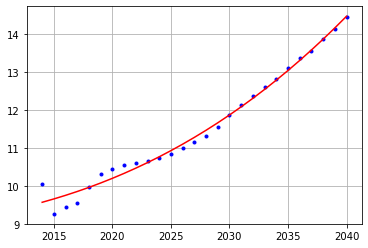

In [84]:
plt.plot(x+2014,y,'ob',ms=3)
pol=np.dot(sol2.x,[x**i for i in range(n+1)])
plt.plot(x+2014,pol,'r')
plt.grid()

In [85]:
n=3
beta0=np.random.rand(n+1)
sol3=opt.minimize(objn,beta0,args=(x,y,n))
sol3

      fun: 0.8404346750362717
 hess_inv: array([[ 2.27239551e-01, -6.41154282e-02,  4.83488408e-03,
        -1.06428267e-04],
       [-6.41154282e-02,  2.61882137e-02, -2.28212599e-03,
         5.43057023e-05],
       [ 4.83488408e-03, -2.28212599e-03,  2.13850630e-04,
        -5.32141301e-06],
       [-1.06428267e-04,  5.43057023e-05, -5.32141301e-06,
         1.36446488e-07]])
      jac: array([-5.66244125e-07, -3.65078449e-07, -8.41915607e-07, -3.27080488e-06])
  message: 'Optimization terminated successfully.'
     nfev: 65
      nit: 8
     njev: 13
   status: 0
  success: True
        x: array([9.56752288e+00, 8.46496125e-02, 3.20207230e-03, 3.04660146e-05])

In [91]:
n=1
x=2041-2014
np.dot(sol1.x,[x**i for i in range(n+1)])

14.155781187366212

>**2.2.-** Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

In [93]:
n=3
x=2041-2014
np.dot(sol3.x,[x**i for i in range(n+1)])

14.787035689939325

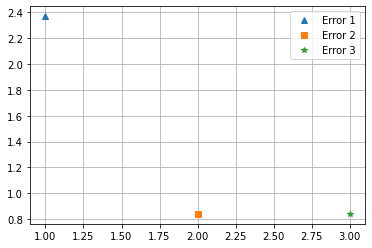

In [94]:
plt.plot(1,sol1.fun,'^',label='Error 1')
plt.plot(2,sol2.fun,'s',label='Error 2')
plt.plot(3,sol3.fun,'*',label='Error 3')
plt.legend(loc='best')
plt.grid()

In [96]:
x=df['year'].values-1988

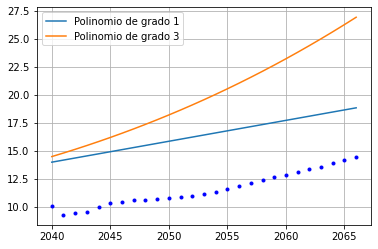

In [99]:
plt.plot(x+2014,y,'ob',ms=3) # Puntos para ajustar
n=1
pol1=np.dot(sol1.x,[x**i for i in range(n+1)]) # polinomio de grado 1

n=3
pol3=np.dot(sol3.x,[x**i for i in range(n+1)]) # polinomio de grado 3
plt.plot(x+2014,pol1,label='Polinomio de grado 1')

plt.plot(x+2014,pol3,label='Polinomio de grado 3')
plt.legend(loc='best')
plt.grid()

<hr>   

### Reactivo 3 (4 ptos) <a name="Problema3"></a> 


Una ventana Normanda se construye juntando
un semicírculo a la parte superior de una ventana rectangular ordinaria (vea la figura). 

<img style="float: center;;" src='Figures/ventana.png' width="200" height="100"/></a>

>**3.1.-** Encuentre las dimensiones de una ventana Normanda de área máxima $A(x)$, si el perímetro total es de 16 pies. (**Hint:** perimetro de una semi-circunferencia $\pi r$).

>Formule el problema y realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

El perímetro de la ventana. P es constante

---> $$P = x + 2y + πx/2 = x(1 + π/2)+ 2y = x((2 + π)/2)+ 2y$$

El  ́area de la ventana. Esta es la función que deseamos
optimizar.

---> $$A = xy +π( x/2)^2 = xy + (π/8) x^2$$

Despejamos y de la restricción, esto es, de la fórmula del perímetro

---> $$y = 1/2(P − ((2 + π)/2) x)= P/2 − ((2 + π)/4) x$$

Sustituimos en la función  ́area y queda en función de una sola variable

---> $$A = x( P/2 − ((2 + π)/4) x)+ (π/8) x^2 = (P/2) x − ((2 + π)/4) x2 + (π/8) x^2 = P/2 + ((−4 − 2π + π)/8) x^2 

---> $$A=(P/2) x ((− 4 + π)/8) x^2$$

---> $$A ′ = P/2 ((− 4 + π)/4) x$$

---> $$A ′′ = ((− 4 + π)/4) < 0$$

Segunda derivada siempre negativa 

---> $$A ′ = 0 ⇒ P/2 − ((4 + π)/4) x = 0 ⇒ x =(P/2)/((4 + π)/4)= 2P/(4 + π)$$

Máximo absoluto

---> $$y = P/2 − ((2 + π)/4)(2P/(4 + π)) = 1/2(P − ((2 + π)/(4 + π)) P)= 1/2( 2P/(4 + π))$$

La mitad de x

---> $$y = 16/4 + π$$


In [33]:
def A(x):
    return 8*x-((4+np.pi)/8)*x**2
sym.var('x',real=True)

x

In [34]:
A(x)

-0.892699081698724*x**2 + 8*x

In [43]:
dA = sym.diff(A(x),x)
dA

8 - 1.78539816339745*x

In [45]:
p_criticos = sym.solve(dA,x)
p_criticos

[4.48079322809245]

In [35]:
dA=sym.diff(A(x),x)
c=sym.solve(dA,x)
c

[4.48079322809245]

In [46]:
p_criticos[0]

4.48079322809245

In [48]:
d2A=sym.diff(dA,x)
d2A

-1.78539816339745

In [62]:
x_num = np.linspace(0,10)
x_num

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

>**3.2.-** Usando `sympy` maximice la función $A(x)$ en su dominio.

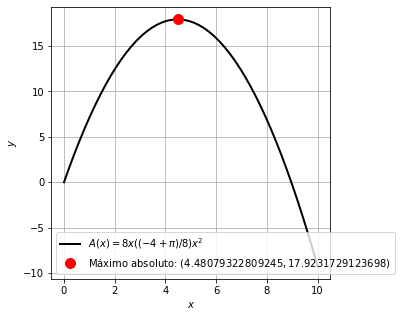

In [65]:
plt.figure(figsize=(5,5))
plt.plot(x_num,A(x_num), 'k', lw=2, 
         label = '$A(x)=8x((-4+\pi)/8)x^2$')

plt.plot(p_criticos[0], A(p_criticos[0]), 'ro', ms=10,
        label = f'Máximo absoluto: $({p_criticos[0]},{A(p_criticos[0])})$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()